# LOAD LIBRARIES AND CONSTANTS

## Import libraries

In [1]:
# Basic Libraries
%matplotlib widget
import warnings
import os
import glob
from multiprocessing import Pool

# Numerical and Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from upsetplot import UpSet


# Phylogenetic and Bioinformatics Analysis
from ete4 import NCBITaxa

# Suppress warnings
warnings.filterwarnings("ignore")


## Set plotting preferences

In [2]:
# --- Color Palette and Style Settings ---
sns.set_style("ticks", {'axes.grid': True})
sns.set_palette("colorblind")


# --- Matplotlib rcParams Configuration ---
# General Linewidth and Tick Settings
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams['grid.linewidth'] = 0.25
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'

# --- Font and Text Settings ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Liberation Sans']
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 5

# Tick Mark Size
plt.rcParams["xtick.major.size"] = 4
plt.rcParams["ytick.major.size"] = 4

# Title and Label Padding and Font Size
plt.rcParams["axes.titlepad"] = 7
plt.rcParams["axes.titlesize"] = 7
plt.rcParams['axes.labelsize'] = 7

# Tick Label Size
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6


# --- Axis and Legend Settings ---
# Axis Labels and Title Font Weight
plt.rcParams['axes.labelweight'] = 'bold'  # Bold axis labels
plt.rcParams['axes.titleweight'] = 'bold'  # Bold axis titles

# Legend Settings
plt.rcParams['legend.fontsize'] = 5
plt.rcParams['legend.title_fontsize'] = 6
plt.rcParams['legend.labelspacing'] = 0.2  # Reduce space between labels

# --- File Saving and Output Settings ---
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['figure.dpi'] = 150 
plt.rcParams['svg.fonttype'] = 'none'  # Ensure fonts are embedded in SVG files
points_to_inches = 1 / 72  # Conversion factor for points to inches

## Set Paths

In [3]:
# SAMPLES=
work_dir="/home/lmf/DANIEL/VIRAL_METAGENOMES/"

mapping_dir=work_dir+ "06_MAPPING"
clean_dir=work_dir+ "02_CLEAN_DATA"
sampling="tot"

raw_counts_file=mapping_dir + "/counts_raw.txt"
norm_counts_file=mapping_dir + "/counts_normalised.txt"
raw_rpkm_file=mapping_dir + "/RPKM_raw.txt"
norm_rpkm_file=mapping_dir + "/RPKM_normalised.txt"
percentage_rpkm_file=mapping_dir + "/breadth_coverage_percent.txt"
bases_rpkm_file=mapping_dir + "/breadth_coverage_bases.txt"
contig_length_file=mapping_dir + "/contig_lengths.txt"

raw_counts_file_sub=mapping_dir + "/counts_raw_sub.txt"
norm_counts_file_sub=mapping_dir + "/counts_normalised_sub.txt"
raw_rpkm_file_sub=mapping_dir + "/RPKM_raw_sub.txt"
norm_rpkm_file_sub=mapping_dir + "/RPKM_normalised_sub.txt"
percentage_rpkm_file_sub=mapping_dir + "/breadth_coverage_percent_sub.txt"
bases_rpkm_file_sub=mapping_dir + "/breadth_coverage_bases_sub.txt"
contig_length_file_sub=mapping_dir + "/contig_lengths_sub.txt"

filtered_list=work_dir+"05_vOTUs/filtered_95-85_positive_viral_contigs_list.tot.txt"
merged_summary=work_dir+"05_vOTUs/vOTU_clustering_summary.tot.csv"
blast_results=work_dir + "07_ANNOTATION/blast_output_ViralRefSeq_filtered_95-85_positive_viral_contigs.tot.csv"
iphop_results=work_dir + "07_ANNOTATION/iphop_hostID_filtered_95-85_positive_viral_contigs.tot_resultsDir/Host_prediction_to_genus_m90.csv"
PhaGCN_results=work_dir + "07_ANNOTATION/PhaGCN_taxonomy_report_filtered_95-85_positive_viral_contigs.tot.csv"
nucleotide_content=work_dir+"07_ANNOTATION/nucleotide_content_viral_contigs_clustered_with_filtered_95-85_positive_viral_contigs.tot.tsv"
viga_topology=work_dir + "07_ANNOTATION/viga_topology_filtered_95-85_positive_viral_contigstot.txt"


qc_read_counts=work_dir +'/FIGURES_AND_TABLES/01_qc_read_counts_paired.tot.csv'
DNA_metadata_file="/home/lmf/DANIEL/VIRAL_METAGENOMES/DNA_extraction_metadata.csv"


filtered_RPKM_norm_file=mapping_dir + "/filtered_RPKM_normalised_tot.txt"
filtered_RPKM_norm_sub_file=mapping_dir + "/filtered_RPKM_normalised_sub.txt"

filtered_75_RPKM_norm_file=mapping_dir + "/filtered_75_RPKM_normalised_tot.txt"
filtered_counts_norm_file=mapping_dir + "/filtered_counts_normalised_tot.txt"


### vOTUs from WRB >75% covered

In [4]:
WRB_coverage=pd.read_csv("/home/lmf/DANIEL/VIRAL_METAGENOMES/06_MAPPING/REFERENCES/WRB_vOTUs_breadth_coverage_percent_tot.txt", index_col=0).T
checkv_WRB=pd.read_csv("/home/lmf/PhylloVir/WRB/05_vOTUs/checkV_merged_quality_summary.tot.txt", sep="\t", names=["vOTU", "length", "2", "3", "4", "5", "6", "quality", "8", "completeness", "10", "11", "12", "13"])
WRB_counts=pd.read_csv("/home/lmf/DANIEL/VIRAL_METAGENOMES/06_MAPPING/REFERENCES/WRB_vOTUs_counts_raw_tot.txt", index_col=0).T
WRB_counts=WRB_counts.sum().to_frame()
WRB_coverage_max=WRB_coverage.max().to_frame().merge(WRB_counts, left_index=True,right_index=True).merge(checkv_WRB, left_index=True,right_on="vOTU")
WRB_cov_75=WRB_coverage_max[WRB_coverage_max["0_x"]>75].sort_values(by="0_x")["vOTU"]
WRB_cov_75.to_csv("/home/lmf/DANIEL/VIRAL_METAGENOMES/WRB_75_contigs.txt", index=False, header=False)
WRB_cov_75

1337866     WRB_90_NODE_7328_length_10601_cov_5.561635
8071           WRB_NODE_8338_length_10253_cov_7.578251
3210          WRB_NODE_3316_length_20322_cov_18.399122
6589           WRB_NODE_6810_length_11862_cov_6.327772
903346     WRB_70_NODE_5237_length_11300_cov_12.237617
                              ...                     
361616       WRB_30_NODE_4_length_179226_cov_23.193837
723303     WRB_60_NODE_1949_length_20990_cov_10.540721
8230           WRB_NODE_8507_length_10107_cov_5.091922
573747     WRB_50_NODE_1533_length_22286_cov_34.759840
1102453     WRB_80_NODE_496_length_51546_cov_57.817075
Name: vOTU, Length: 66, dtype: object

In [5]:
# Importing necessary libraries
from ete4 import NCBITaxa
import matplotlib.pyplot as plt

# Initialize NCBITaxa for taxonomic data retrieval
ncbi = NCBITaxa()

# List of desired taxonomy ranks to extract
desired_ranks = ['domain', 'phylum', 'class', 'order', 'family', 'genus']

# Function to plot the color palette with genus names
def plot_palette(palette):
    """
    This function plots a horizontal color palette with corresponding genus names.
    Each color in the palette is displayed alongside its genus label.
    
    Args:
    - palette (dict): A dictionary with genus names as keys and corresponding color codes as values.
    """
    fig, ax = plt.subplots(figsize=(5, 0.7))  # Create a figure with specific dimensions for color visualization
    for i, (genus, color) in enumerate(palette.items()):
        ax.add_patch(plt.Rectangle((i / len(palette), 0), 1 / len(palette), 1, color=color))  # Add each color as a rectangle
        # Display genus name centered within the color block
        ax.text((i + 0.5) / len(palette), 0.5, genus.replace(" ", "\n"), ha='center', va='center', 
                color='white', fontsize=5, fontweight='bold')  # White text on color blocks
    
    ax.axis('off')  # Hide axis for cleaner visualization
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()  # Display the plot

# Function to get the full taxonomy lineage for a given genus
def get_full_lineage(taxonomy):
    """
    This function retrieves the full lineage of a genus based on its taxonomy string.
    It uses the NCBITaxa API to obtain lineage information and returns a list of taxonomy ranks.
    
    Args:
    - taxonomy (str): A string representing the taxonomy (e.g., 'Kingdom; Phylum; ...; Genus').
    
    Returns:
    - list: A list containing the names of the taxonomy ranks for the given genus.
    """
    genus_name = taxonomy.split(";")[-1].replace("__", "_").split("_")[1]  # Extract genus name from the taxonomy string
    try:
        # Fetch taxid from NCBI using the genus name, then get its lineage
        taxid = ncbi.get_name_translator([genus_name])[genus_name][0]
        lineage = ncbi.get_lineage(taxid)  # Get the lineage of the genus
        ranks = ncbi.get_rank(lineage)  # Get the ranks for the lineage
        names = ncbi.get_taxid_translator(lineage)  # Get the taxonomic names for the lineage

        # Collect the names for the desired taxonomy ranks
        specific_lineage = []
        for rank in desired_ranks:
            # Find the taxid with the current rank and add the corresponding name to the lineage
            taxid_with_rank = next((taxid for taxid, r in ranks.items() if r == rank), None)
            if taxid_with_rank is not None:
                specific_lineage.append(names[taxid_with_rank])  # Add rank name to lineage
            else:
                specific_lineage.append('N/A')  # If rank not found, append 'N/A'
    except Exception:
        # If NCBI fetch fails, split the taxonomy string as fallback (return original)
        specific_lineage = taxonomy.split(";")
    
    return specific_lineage  # Return the full lineage

# Function to select a specific row from a group (based on 'blast' method and highest confidence score)
def select_row(group):
    """
    This function selects a row from the given group based on the highest confidence score.
    If rows with 'blast' in the 'List of methods' column are found, it returns the one with the highest confidence score.
    Otherwise, it returns the row with the highest confidence score from the entire group.
    
    Args:
    - group (pd.DataFrame): A dataframe representing the group of rows to be selected from.
    
    Returns:
    - pd.Series: The selected row from the group.
    """
    # Filter rows that contain 'blast' in the 'List of methods' column
    blast_rows = group[group['List of methods'].str.contains('blast')]  

    if not blast_rows.empty:
        # If 'blast' rows exist, return the row with the highest confidence score among them
        return blast_rows.loc[blast_rows['Confidence score'].idxmax()]
    else:
        # Otherwise, return the row with the highest confidence score from the entire group
        return group.loc[group['Confidence score'].idxmax()]


In [6]:
# # Color mapping for top taxa
color_mapping = {
    0: '#E6194B',  # Red
    1: '#3CB44B',  # Green
    2: '#FFE119',  # Yellow
    3: '#0082FC',  # Blue
    4: '#F58231',  # Orange
    5: '#911EB4',  # Purple
    6: '#42D4F4',  # Cyan
    7: '#F032E6',  # Magenta
}




### Colors Genus

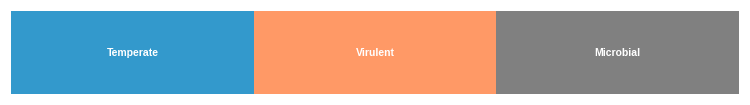

In [7]:
palette_lifestyle = {
    'Temperate': "#3399CC",
    'Virulent': "#FF9966",
    'Microbial': "gray"
}
plot_palette(palette_lifestyle)

### Colors Quality

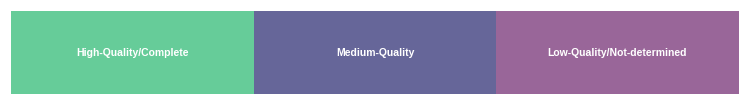

In [8]:
palette_quality = {
    'High-Quality/Complete': "#66CC99",
    'Medium-Quality': "#666699",
    'Low-Quality/Not-determined': "#996699",
}

plot_palette(palette_quality)

## Define SAMPLES

In [9]:
SAMPLES_ALL=[]
files=glob.glob(work_dir + "02_CLEAN_DATA/*reverse_paired_clean.tot.fastq.gz")
for f in files:
    SAMPLES_ALL.append(os.path.basename(f).split("_reverse")[0])
SAMPLES_ALL.sort()
print(len(SAMPLES_ALL), "ALL")
print(SAMPLES_ALL)
SAMPLES=SAMPLES_ALL
SAMPLES_KEY=['B_CIT1B_V', 'B_CIT1F_V', 'B_CIT2B_V', 'B_CIT2F_V', 'B_CIT3B_V', 'B_CIT3F_V', 'B_CIT4B_V', 'B_CIT4F_V', 'B_CNT1B_V', 'B_CNT1F_V', 'B_CNT2B_V', 'B_CNT2F_V', 'B_CNT3B_V', 'B_CNT3F_V', 'B_CNT4B_V', 'B_CNT4F_V', 'B_OIT1B_V', 'B_OIT1F_V', 'B_OIT2B_V', 'B_OIT2F_V', 'B_OIT3B_V', 'B_OIT3F_V', 'B_OIT4B_V', 'B_OIT4F_V', 'B_ORT1B_V', 'B_ORT1F_V', 'B_ORT2B_V', 'B_ORT2F_V', 'B_ORT3B_V', 'B_ORT3F_V', 'B_ORT4B_V', 'B_ORT4F_V', 'RS_CIT1B_V', 'RS_CIT1F_V', 'RS_CIT2B_V', 'RS_CIT2F_V', 'RS_CIT3B_V', 'RS_CIT3F_V', 'RS_CIT4B_V', 'RS_CIT4F_V', 'RS_CNT1B_V', 'RS_CNT1F_V', 'RS_CNT2B_V', 'RS_CNT2F_V', 'RS_CNT3B_V', 'RS_CNT3F_V', 'RS_CNT4B_V', 'RS_CNT4F_V', 'RS_OIT1B_V', 'RS_OIT1F_V', 'RS_OIT2B_V', 'RS_OIT2F_V', 'RS_OIT3B_V', 'RS_OIT3F_V', 'RS_OIT4B_V', 'RS_OIT4F_V', 'RS_ORT1B_V', 'RS_ORT1F_V', 'RS_ORT2B_V', 'RS_ORT2F_V', 'RS_ORT3B_V', 'RS_ORT3F_V', 'RS_ORT4B_V', 'RS_ORT4F_V']
print(len(SAMPLES_KEY), "KEY")
print(SAMPLES_KEY)


72 ALL
['B_C1_V', 'B_C2_V', 'B_C3_V', 'B_C4_V', 'B_CIT1B_V', 'B_CIT1F_V', 'B_CIT2B_V', 'B_CIT2F_V', 'B_CIT3B_V', 'B_CIT3F_V', 'B_CIT4B_V', 'B_CIT4F_V', 'B_CNT1B_V', 'B_CNT1F_V', 'B_CNT2B_V', 'B_CNT2F_V', 'B_CNT3B_V', 'B_CNT3F_V', 'B_CNT4B_V', 'B_CNT4F_V', 'B_OIT1B_V', 'B_OIT1F_V', 'B_OIT2B_V', 'B_OIT2F_V', 'B_OIT3B_V', 'B_OIT3F_V', 'B_OIT4B_V', 'B_OIT4F_V', 'B_ORT1B_V', 'B_ORT1F_V', 'B_ORT2B_V', 'B_ORT2F_V', 'B_ORT3B_V', 'B_ORT3F_V', 'B_ORT4B_V', 'B_ORT4F_V', 'RS_C1_V', 'RS_C2_V', 'RS_C3_V', 'RS_C4_V', 'RS_CIT1B_V', 'RS_CIT1F_V', 'RS_CIT2B_V', 'RS_CIT2F_V', 'RS_CIT3B_V', 'RS_CIT3F_V', 'RS_CIT4B_V', 'RS_CIT4F_V', 'RS_CNT1B_V', 'RS_CNT1F_V', 'RS_CNT2B_V', 'RS_CNT2F_V', 'RS_CNT3B_V', 'RS_CNT3F_V', 'RS_CNT4B_V', 'RS_CNT4F_V', 'RS_OIT1B_V', 'RS_OIT1F_V', 'RS_OIT2B_V', 'RS_OIT2F_V', 'RS_OIT3B_V', 'RS_OIT3F_V', 'RS_OIT4B_V', 'RS_OIT4F_V', 'RS_ORT1B_V', 'RS_ORT1F_V', 'RS_ORT2B_V', 'RS_ORT2F_V', 'RS_ORT3B_V', 'RS_ORT3F_V', 'RS_ORT4B_V', 'RS_ORT4F_V']
64 KEY
['B_CIT1B_V', 'B_CIT1F_V', 'B_CIT2B_V

# LOAD METADATA


In [10]:
# Step 1: Load Data

# Load nucleotide composition data, only retaining sequence and length columns
nucleotide_content_microbial = pd.read_csv("/home/lmf/DANIEL/MG-Assembly/ALL_MG_megahit_2000bp_derreplicated_nucleotide_composition.txt", 
                                            sep="\t", 
                                            names=["sequence", "length", "A", "C", "G", "T", "#2", "#3", "#4", "#CpG", "#tv", "#ts", "#CpG-ts"]
                                           )[["sequence", "length"]]

# Load Sourmash microbial classification data
sourmash_microbial = pd.read_csv("/home/lmf/DANIEL/MG-Assembly/ALL_MG_megahit_2000bp_derreplicated_tax.classifications.csv")

# Merge nucleotide content data with Sourmash microbial data on the sequence column
sourmash_microbial = sourmash_microbial.merge(nucleotide_content_microbial, left_on="query_name", right_on="sequence", how="left")

# Expand the 'lineage' column into separate columns for taxonomic ranks (domain, phylum, etc.)
sourmash_microbial_expanded = sourmash_microbial["lineage"].str.split(";", expand=True)
sourmash_microbial = sourmash_microbial.join(sourmash_microbial_expanded)

# Load spacer sequences list from a file
spacer_sequences_list = pd.read_csv("/home/lmf/DANIEL/MG-Assembly/ALL_MG_megahit_2000bp_derreplicated_minced_predicted_spacers_contig_list.txt", 
                                    names=["contig"])["contig"].to_list()

# Step 2: Load SpacePharer MINCED Results

# Define column names for the SpacePharer MINCED results file
headers = ["spacer_acc", "phage_acc", "p_bh", "spacer_start", "spacer_end", "phage_start", "phage_end", 
           "putative_5_3'_PAM", "npi"]

# Load the SpacePharer MINCED results
spacepharer_df_minced = pd.read_csv("/home/lmf/DANIEL/VIRAL_METAGENOMES/07_ANNOTATION/spacepharer_minced_95-85_positive_viral_contigs.tot.tsv", 
                                    sep="\t", 
                                    names=headers)

# Clean spacer accession names by removing special characters ('#' and '>') for consistency
spacepharer_df_minced['spacer_acc'] = spacepharer_df_minced['spacer_acc'].str.replace('#', '').str.replace('>', '')

# Extract spacer accession and CRISPR region information into separate columns
spacepharer_df_minced[['acc_temp', 'CRISPR']] = spacepharer_df_minced['spacer_acc'].str.split("_CRISPR_", expand=True)

# Filter out unwanted spacer accessions (those with a specific sequence name)
spacepharer_df_minced = spacepharer_df_minced[spacepharer_df_minced['acc_temp'] != "ALL_MG_megahit_2000bp_derreplicated_minced_predicted_spacers.fa"]

# Calculate hit length as the absolute difference between phage start and end positions
spacepharer_df_minced["hit_length"] = np.abs(spacepharer_df_minced["phage_end"] - spacepharer_df_minced["phage_start"])

# Merge SpacePharer results with Sourmash microbial lineage data based on the spacer accession
spacepharer_df_minced = spacepharer_df_minced.merge(sourmash_microbial[["query_name", "lineage"]], 
                                                   left_on="acc_temp", 
                                                   right_on="query_name", 
                                                   how="inner")

# Sort the data by hit length in descending order and take the first row for each unique phage accession
spacepharer_df_minced = spacepharer_df_minced.sort_values(by="hit_length", ascending=False)
spacepharer_df_minced = spacepharer_df_minced.groupby("phage_acc").first().reset_index().set_index("phage_acc")

# Split the lineage into desired ranks and add them as new columns
spacepharer_df_minced[desired_ranks + ["strain"]] = spacepharer_df_minced["lineage"].str.split(";", expand=True)

# Step 3: Load Other Datasets and Merge Data

# Load DNA metadata file
DNA_metadata_df = pd.read_csv(DNA_metadata_file, index_col=0)

# Load metadata samples file
metadata_samples = pd.read_csv(work_dir + "metadata_samples.csv", index_col=0)

# Load vOTU representatives list
vOTU_representatives = pd.read_csv(filtered_list, names=["vOTU"])

# Load summary data for vOTUs
summary_df = pd.read_csv(merged_summary, index_col=0)

# Load and filter BLAST results based on query coverage (qcovs)
blast_df = pd.read_csv(blast_results, sep="\t", 
                       names=["qseqid", "sseqid", "salltitles", "qstart", "qend", "qlen", "slen", 
                              "qcovs", "evalue", "length", "pident"]
                      ).sort_values(by="qcovs").groupby("qseqid").last().reset_index()

# Load iPHoP results and extract full lineage for desired ranks (filter by domain 'N/A')
iphop_df = pd.read_csv(iphop_results)
iphop_df[desired_ranks] = iphop_df["Host genus"].apply(get_full_lineage).to_list()
iphop_df = iphop_df[iphop_df["domain"] == "N/A"]

# Select representative row for each virus in iPHoP results
iphop_df = iphop_df.groupby('Virus').apply(select_row).reset_index(drop=True).reset_index()

# Load PhaGCN results and rename the 'prediction' column to 'PhaGCN_family'
PhaGCN_df = pd.read_csv(PhaGCN_results).rename(columns={"prediction": "PhaGCN_family"})

# Load nucleotide content data for the samples
nucleotide_content_df = pd.read_csv(nucleotide_content, sep="\t", index_col=0, 
                                    names=["seq_length", "#A", "#C", "#G", "#T", "#2", "#3", "#4", 
                                           "#CpG", "#tv", "#ts", "#CpG-ts"])

# Load BacPhlIP lifestyle prediction data
bacphliph_df = pd.read_csv("/home/lmf/DANIEL/VIRAL_METAGENOMES/07_ANNOTATION/filtered_95-85_positive_viral_contigs.tot_bacphlip.csv", sep="\t", index_col=0)
bacphliph_df['BACPLHIP_lifestyle'] = bacphliph_df['Virulent'].apply(lambda x: 'Virulent' if x >= 0.5 else 'Temperate')

# Load filtered counts and RPKM data for each sample
filtered_counts_norm_df = pd.read_csv(filtered_counts_norm_file, index_col=0)
filtered_counts_norm_df = filtered_counts_norm_df[SAMPLES_KEY][filtered_counts_norm_df[SAMPLES_KEY].gt(0).any(axis=1)]

# Filter RPKM normalized data based on the list of vOTUs
list_index = filtered_counts_norm_df.index.to_list()
filtered_RPKM_norm_df = pd.read_csv(filtered_RPKM_norm_file, index_col=0).loc[list_index]
filtered_RPKM_norm_sub_df = pd.read_csv(filtered_RPKM_norm_sub_file, index_col=0).loc[list_index]
filtered_75_RPKM_norm_df = pd.read_csv(filtered_75_RPKM_norm_file, index_col=0).loc[list_index]

# Step 4: Filter, Calculate, and Merge DataFrames

# Calculate relative abundances for each sample
relative_norm_df = filtered_RPKM_norm_df * 100 / filtered_RPKM_norm_df.sum()
relative_norm_75_df = filtered_75_RPKM_norm_df * 100 / filtered_75_RPKM_norm_df.sum()

# Calculate richness per sample (number of non-zero relative abundances)
richness_per_sample_df = relative_norm_df.apply(lambda col: (col > 0).sum()).to_frame()
richness_per_sample_df.columns = ["richness"]

# Calculate mean and max RPKM values for each sample
mean_rpkm = filtered_RPKM_norm_df[SAMPLES_KEY].T.mean().to_frame()
mean_rpkm.columns = ["mean_rpkm"]
max_rpkm = filtered_RPKM_norm_df[SAMPLES_KEY].T.max().to_frame()
max_rpkm.columns = ["max_rpkm"]

# Calculate mean and max relative abundances for each sample
mean_relative = relative_norm_df[SAMPLES_KEY].T.mean().to_frame()
mean_relative.columns = ["mean_relative"]
max_relative = relative_norm_df[SAMPLES_KEY].T.max().to_frame()
max_relative.columns = ["max_relative"]

# Step 5: Merge all data into the metadata dataframe
metadata_df = vOTU_representatives.merge(summary_df, how="left", left_on="vOTU", right_on="vOTU_name") \
    .merge(max_rpkm, how="left", left_on="vOTU", right_index=True) \
    .merge(nucleotide_content_df, how="left", left_on="vOTU", right_index=True) \
    .merge(relative_norm_df, left_on="vOTU", right_index=True, how="left") \
    .merge(PhaGCN_df, how="left", left_on="vOTU_name", right_on="contig_name") \
    .merge(mean_rpkm, how="left", left_on="vOTU", right_index=True) \
    .merge(max_relative, how="left", left_on="vOTU", right_index=True) \
    .merge(mean_relative, how="left", left_on="vOTU", right_index=True) \
    .merge(blast_df, how="left", left_on="vOTU", right_on="qseqid") \
    .merge(iphop_df, how="left", left_on="vOTU", right_on="Virus") \
    .merge(bacphliph_df, left_on="vOTU", right_index=True, how="left")

# Add GC content column to the metadata
metadata_df["GC"] = (metadata_df["#G"] + metadata_df["#C"]) / metadata_df["seq_length"]

# Drop unnecessary columns from the metadata dataframe
metadata_df = metadata_df.drop(
    ["vOTU_name", "contig_name", "VirSorter2_seqname", "geNomad_seq_name", 
     "geNomad_viral_name", "geNomad_viral_conservative_name"], 
    axis=1
)
metadata_df.set_index('vOTU', inplace=True)

# Step 6: Update with MINCED spacers
# Add taxonomic information from SpacePharer MINCED results to the metadata
metadata_df.loc[spacepharer_df_minced.index, desired_ranks] = spacepharer_df_minced[desired_ranks]

# Step 7: Add binary columns for specific metadata
# Add a column to indicate if a vOTU is associated with a provirus
metadata_df['geNomad_provirus'] = metadata_df.index.str.contains('provirus').astype(bool)

# Step 8: Add presence/absence data for specific samples
# Add column indicating whether a sample is "interesting" based on non-zero RPKM values
metadata_df['INTERESTING'] = filtered_RPKM_norm_df[SAMPLES_KEY].gt(0).any(axis=1).map({True: 'TRUE'})

# Final clean-up: Strip any leading/trailing whitespaces from string columns
metadata_df = metadata_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Filter the metadata dataframe based on the list of vOTU indices
metadata_df = metadata_df.loc[list_index]

# Save the final metadata dataframe to a CSV file
metadata_df.to_csv("/home/lmf/DANIEL/VIRAL_METAGENOMES/vOTU_metadata.csv")

# Display the final metadata dataframe
metadata_df


,count_Y,checkV_contig_length,VirSorter2_positive,VIBRANT_positive,geNomad_viral,geNomad_viral_conservative,VIBRANT_circular,VIBRANT_lifecycle,VIBRANT_quality,VIBRANT_total_genes,...,class,order,family,genus,Virulent,Temperate,BACPLHIP_lifestyle,GC,geNomad_provirus,INTERESTING
vOTU,,,,,,,,,,,,,,,,,,,,,
B_C1_V_NODE_5_length_33518_cov_9.610555,3,33518.0,Y,Y,Y,Y,NaN,lytic,low quality draft,41.0,...,NaN,NaN,NaN,NaN,0.862500,0.137500,Virulent,0.664449,False,TRUE
B_C1_V_NODE_9_length_25732_cov_8.680414,3,25732.0,Y,Y,Y,NaN,NaN,lytic,low quality draft,52.0,...,NaN,NaN,NaN,NaN,0.945292,0.054708,Virulent,0.561402,False,TRUE
B_C1_V_NODE_11_length_23855_cov_10.094160,3,23855.0,Y,Y,Y,NaN,NaN,lytic,low quality draft,39.0,...,NaN,NaN,NaN,NaN,0.947852,0.052148,Virulent,0.544498,False,TRUE
B_C1_V_NODE_17_length_17197_cov_9.826858,3,17197.0,Y,Y,Y,Y,NaN,lytic,low quality draft,29.0,...,NaN,NaN,NaN,NaN,0.700000,0.300000,Virulent,0.631854,False,TRUE
B_C1_V_NODE_18_length_16898_cov_7.101645,3,16898.0,Y,Y,Y,Y,NaN,lytic,low quality draft,21.0,...,NaN,NaN,NaN,NaN,0.998716,0.001284,Virulent,0.384365,False,TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RS_ORT4F_V_80_NODE_2_length_33955_cov_9.121003,3,33955.0,Y,Y,Y,Y,NaN,lytic,low quality draft,34.0,...,NaN,NaN,NaN,NaN,0.987500,0.012500,Virulent,0.631660,False,TRUE
RS_ORT4F_V_80_NODE_73_length_12112_cov_11.308866,3,12112.0,Y,Y,Y,Y,NaN,lytic,low quality draft,14.0,...,NaN,NaN,NaN,NaN,0.945154,0.054846,Virulent,0.650512,False,TRUE
RS_ORT4F_V_80_NODE_100_length_10819_cov_5.584820,3,10819.0,Y,Y,Y,NaN,NaN,lytic,low quality draft,18.0,...,NaN,NaN,NaN,NaN,0.937500,0.062500,Virulent,0.664479,False,TRUE


## Metadata Statistics

In [25]:
# Step 1: Filter and sort the metadata dataframe
# Select metadata rows marked as "INTERESTING" and sort them by "mean_relative" in descending order
rhizosphere_phages_metadata = metadata_df[(metadata_df["INTERESTING"] == "TRUE")].sort_values("mean_relative", ascending=False)

# Step 2: Print the sum of "mean_relative" for the rhizosphere phages
print(rhizosphere_phages_metadata["mean_relative"].sum())

# Step 3: Create a dataframe for average lengths and other relevant features
average_length_df_all = rhizosphere_phages_metadata[[
    "checkV_contig_length", "mean_relative", "GC", "VIBRANT_lifecycle", 
    "checkv_quality", 'BACPLHIP_lifestyle', "genus"
]]

# Display total number of vOTUs
print("total vOTUs:", len(average_length_df_all))

# Display statistics on the lengths of all vOTUs
print("Length all vOTUs")
print("mean", average_length_df_all["checkV_contig_length"].mean())

# Step 4: Count lifestyle categories
print("count lifestyle")
print(rhizosphere_phages_metadata["BACPLHIP_lifestyle"].value_counts().to_frame())

# Step 5: Count the different categories of checkv_quality
print("count per checkv_quality")
print(rhizosphere_phages_metadata["checkv_quality"].value_counts().to_frame())

# Step 6: Filter for "Complete" or "High-quality" vOTUs
# Create a new dataframe with only "Complete" or "High-quality" quality vOTUs
average_length_df = rhizosphere_phages_metadata[
    ((rhizosphere_phages_metadata['checkv_quality'] == "Complete") | 
     (rhizosphere_phages_metadata['checkv_quality'] == "High-quality"))
][["checkV_contig_length", "mean_relative", "GC", "max_relative", 'BACPLHIP_lifestyle']]

# Print the count of vOTUs that are "Complete" or "High-quality"
print("complete/high-quality", len(average_length_df))

# Count the number of "Complete"/"High-quality" vOTUs that are "Jumbophages" (greater than 200 kb)
print("complete/high-quality Jumbophages (>200kbp)", len(average_length_df[average_length_df["checkV_contig_length"] > 200000]))
print()

# Step 7: Calculate ponderated (weighted) averages
# Multiply contig length by relative abundance to get ponderated length
average_length_df["ponderate_length"] = average_length_df['checkV_contig_length'] * average_length_df['mean_relative']

# Multiply GC content by relative abundance to get ponderated GC content
average_length_df["ponderate_GC"] = average_length_df['GC'] * average_length_df['mean_relative']

# Calculate the ponderated (weighted) average contig length and GC content
average_length_ponderated = average_length_df["ponderate_length"].sum() / average_length_df['mean_relative'].sum()
average_GC_ponderated = average_length_df["ponderate_GC"].sum() / average_length_df['mean_relative'].sum()

# Step 8: Display statistics for the "Complete/High-quality" vOTUs
print("Length complete/high-quality")
print("mean", average_length_df["checkV_contig_length"].mean())  # Mean contig length
print("median", average_length_df["checkV_contig_length"].median())  # Median contig length
print("ponderate", average_length_ponderated)  # Ponderated (weighted) mean contig length
print("min", average_length_df["checkV_contig_length"].min())  # Minimum contig length
print("max", average_length_df["checkV_contig_length"].max())  # Maximum contig length
print()

# Step 9: Display GC content statistics for the "Complete/High-quality" vOTUs
print("GC complete/high-quality")
print("mean", average_length_df["GC"].mean())  # Mean GC content
print("ponderate", average_GC_ponderated)  # Ponderated (weighted) mean GC content
print("min", average_length_df["GC"].min())  # Minimum GC content
print("max", average_length_df["GC"].max())  # Maximum GC content
print()

# Step 10: Display relative abundance statistics for "Complete/High-quality" vOTUs
relative_full_rhizosphere = relative_norm_df.loc[rhizosphere_phages_metadata.index][SAMPLES_KEY].T.max()

print("Relative Abundance complete/high-quality")
print("mean", relative_full_rhizosphere.mean())  # Mean relative abundance
print("min", relative_full_rhizosphere.min())  # Minimum relative abundance
print("max", relative_full_rhizosphere.max())  # Maximum relative abundance

# Step 11: Lifestyle distribution for the "Complete/High-quality" vOTUs
print("count lifestyle")
print(average_length_df["BACPLHIP_lifestyle"].value_counts().to_frame())  # Count by lifestyle

# Step 12: Percentage of each lifestyle category
print("percentage lifestyle")
print(average_length_df["BACPLHIP_lifestyle"].value_counts().to_frame() / average_length_df["BACPLHIP_lifestyle"].value_counts().sum())  # Percentage by lifestyle
print()


100.0
total vOTUs: 2628
Length all vOTUs
mean 22163.820776255707
count lifestyle
                    count
BACPLHIP_lifestyle       
Virulent             2517
Temperate             111
count per checkv_quality
                count
checkv_quality       
Low-quality      2111
Medium-quality    326
Not-determined    139
Complete           29
High-quality       23
complete/high-quality 52
complete/high-quality Jumbophages (>200kbp) 1

Length complete/high-quality
mean 70963.11538461539
median 68454.5
ponderate 75751.16931111117
min 2194.0
max 215226.0

GC complete/high-quality
mean 0.5794058802663506
ponderate 0.5987342533852846
min 0.37538881723693196
max 0.6922019975178771

Relative Abundance complete/high-quality
mean 0.5813041933757158
min 0.0016591911852038375
max 14.10388984566467
count lifestyle
                    count
BACPLHIP_lifestyle       
Virulent               42
Temperate              10
percentage lifestyle
                       count
BACPLHIP_lifestyle          
Virule

## Plot Cummulative Relative Abundance

In [ ]:
# Assuming average_length_df_all is already defined with the necessary columns
# Sort the dataframe by 'mean_relative' in descending order for the entire dataset
df_sorted = average_length_df_all.sort_values(by="mean_relative", ascending=False)

# Calculate the cumulative sum of 'mean_relative' for the entire dataset
df_sorted['cumulative_relative'] = df_sorted['mean_relative'].cumsum()

# Create a new column for the rank based on the index position after sorting for the entire dataset
df_sorted['rank'] = range(1, len(df_sorted) + 1)

# Prepend (0, 0) to start the line from the origin for the entire dataset
df_sorted = pd.concat([pd.DataFrame({'rank': [0], 'cumulative_relative': [0]}), df_sorted])

# Sort the dataframe by 'mean_relative' in descending order for each lifestyle category
df_sorted_lifestyle1 = average_length_df_all[average_length_df_all['BACPLHIP_lifestyle'] == 'Virulent'].sort_values(by="mean_relative", ascending=False)
df_sorted_lifestyle2 = average_length_df_all[average_length_df_all['BACPLHIP_lifestyle'] == 'Temperate'].sort_values(by="mean_relative", ascending=False)

# Calculate the cumulative sum of 'mean_relative' for each lifestyle
df_sorted_lifestyle1['cumulative_relative'] = df_sorted_lifestyle1['mean_relative'].cumsum()
df_sorted_lifestyle2['cumulative_relative'] = df_sorted_lifestyle2['mean_relative'].cumsum()

# Create a new column for the rank based on the index position after sorting for each lifestyle
df_sorted_lifestyle1['rank'] = range(1, len(df_sorted_lifestyle1) + 1)
df_sorted_lifestyle2['rank'] = range(1, len(df_sorted_lifestyle2) + 1)

# Prepend (0, 0) to start the line from the origin for each lifestyle
df_sorted_lifestyle1 = pd.concat([pd.DataFrame({'rank': [0], 'cumulative_relative': [0]}), df_sorted_lifestyle1])
df_sorted_lifestyle2 = pd.concat([pd.DataFrame({'rank': [0], 'cumulative_relative': [0]}), df_sorted_lifestyle2])

# Sort the dataframe by 'mean_relative' in descending order for each "checkv_category"
df_sorted_high_quality = average_length_df_all[(average_length_df_all['checkv_quality'] == 'High-quality') |  (average_length_df_all['checkv_quality'] == 'Complete')].sort_values(by="mean_relative", ascending=False)
df_sorted_medium_quality = average_length_df_all[average_length_df_all['checkv_quality'] == 'Medium-quality'].sort_values(by="mean_relative", ascending=False)
df_sorted_low_quality = average_length_df_all[(average_length_df_all['checkv_quality'] == 'Low-quality') |  (average_length_df_all['checkv_quality'] == 'Not-determined')].sort_values(by="mean_relative", ascending=False)

# Calculate the cumulative sum of 'mean_relative' for each "checkv_category"
df_sorted_high_quality['cumulative_relative'] = df_sorted_high_quality['mean_relative'].cumsum()
df_sorted_medium_quality['cumulative_relative'] = df_sorted_medium_quality['mean_relative'].cumsum()
df_sorted_low_quality['cumulative_relative'] = df_sorted_low_quality['mean_relative'].cumsum()

# Create a new column for the rank based on the index position after sorting for each "checkv_category"
df_sorted_high_quality['rank'] = range(1, len(df_sorted_high_quality) + 1)
df_sorted_medium_quality['rank'] = range(1, len(df_sorted_medium_quality) + 1)
df_sorted_low_quality['rank'] = range(1, len(df_sorted_low_quality) + 1)

# Prepend (0, 0) to start the line from the origin for each "checkv_category"
df_sorted_high_quality = pd.concat([pd.DataFrame({'rank': [0], 'cumulative_relative': [0]}), df_sorted_high_quality])
df_sorted_medium_quality = pd.concat([pd.DataFrame({'rank': [0], 'cumulative_relative': [0]}), df_sorted_medium_quality])
df_sorted_low_quality = pd.concat([pd.DataFrame({'rank': [0], 'cumulative_relative': [0]}), df_sorted_low_quality])



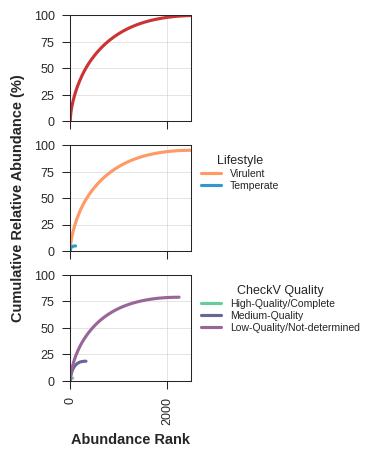

In [18]:
linewidth=1.5
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(180*points_to_inches, 220*points_to_inches), sharex=True)  # 3 rows, 1 column
xlim=2500

# Plot for the entire dataset (Combined)
axs[0].plot(df_sorted['rank'], df_sorted['cumulative_relative'], linestyle='-', lw=linewidth, label='Combined', color="#CC3333")
axs[0].set_ylim(0, 100)
axs[0].set_xlim(0, xlim)  # Adjust as needed
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].grid(True)

# Plot for each lifestyle (Lytic vs Lysogenic)
axs[1].plot(df_sorted_lifestyle1['rank'], df_sorted_lifestyle1['cumulative_relative'], linestyle='-', lw=linewidth, label='Virulent', color=palette_lifestyle["Virulent"])
axs[1].plot(df_sorted_lifestyle2['rank'], df_sorted_lifestyle2['cumulative_relative'], linestyle='-', lw=linewidth, label='Temperate', color=palette_lifestyle["Temperate"])
axs[1].set_ylim(0, 100)
axs[1].set_xlim(0, xlim)  # Adjust as needed
axs[1].set_xlabel('')
axs[1].set_ylabel('Cumulative Relative Abundance (%)')
axs[1].grid(True)
leg1=axs[1].legend(title="Lifestyle",title_fontsize=6,loc='upper left', bbox_to_anchor=(1, 1))
leg1.set_in_layout(False)

axs[2].plot(df_sorted_high_quality['rank'], df_sorted_high_quality['cumulative_relative'], linestyle='-', lw=linewidth, label='High-Quality/Complete', color=palette_quality["High-Quality/Complete"])
axs[2].plot(df_sorted_medium_quality['rank'], df_sorted_medium_quality['cumulative_relative'], linestyle='-', lw=linewidth, label='Medium-Quality', color=palette_quality["Medium-Quality"])
axs[2].plot(df_sorted_low_quality['rank'], df_sorted_low_quality['cumulative_relative'], linestyle='-', lw=linewidth, label='Low-Quality/Not-determined', color=palette_quality["Low-Quality/Not-determined"])
axs[2].set_ylim(0, 100)
axs[2].set_xlim(0, xlim)  # Adjust as needed
axs[2].set_xlabel('Abundance Rank')
axs[2].set_ylabel('')
axs[2].grid(True)
leg2=axs[2].legend(title="CheckV Quality",title_fontsize=6,loc='upper left', bbox_to_anchor=(1, 1))

axs[2].set_xticks(range(0, xlim+1, 2000))  # 8001 ensures it covers the 8000 x-limit
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()

# Show the plots
plt.savefig("/home/lmf/DANIEL/VIRAL_METAGENOMES/FIGURES_AND_TABLES/Cummulative_Relative_Abundance.svg", bbox_inches='tight')

# plt.subplot_tool(fig)

In [19]:
print(round(float(df_sorted_lifestyle1[-1:]["cumulative_relative"].values[0]),2), "%", "  Virulent")
print(round(float(df_sorted_lifestyle2[-1:]["cumulative_relative"].values[0]),2), "%", "  Temperate")
print()
print(round(float(df_sorted_high_quality[-1:]["cumulative_relative"].values[0]),2), " %", "  High-quality")
print(round(float(df_sorted_medium_quality[-1:]["cumulative_relative"].values[0]),2), "%", "  Medium-quality")
print(round(float(df_sorted_low_quality[-1:]["cumulative_relative"].values[0]),2), "%", "  Low-quality")
print()
print(round(float(high_host_relative),2), "%", "  High-quality w Host")

95.28 %   Virulent
4.72 %   Temperate

2.44  %   High-quality
18.52 %   Medium-quality
79.04 %   Low-quality

0.0 %   High-quality w Host


## UpSet PLOT

### Create dataframes

In [20]:
samples_df=filtered_RPKM_norm_df.T.reset_index()[["index"]]
samples_df["treatment_name"]=samples_df["index"].str.split("_").str[1]
samples_df["compartment"]=samples_df["index"].str.split("_").str[0]

upset_metadata=metadata_samples[(~metadata_samples["treatment"].isna())].reset_index()
upset_metadata=samples_df.merge(upset_metadata, left_on="treatment_name", right_on="sample", how="left")
upset_metadata["treatment_compartment"]=upset_metadata["compartment"] + "_" + upset_metadata["treatment"]

grouped_columns = upset_metadata.groupby('treatment_compartment')['index'].apply(list).to_dict()
grouped_columns
# # # # Aggregate columns for each group
result_dict_ubiquitous = {}
result_dict_common = {}
result_dict_core = {}
result_dict_one = {}
for group, columns in grouped_columns.items():
    print(group)
    threshold_ubiquitous = 1 * len(filtered_RPKM_norm_df[columns].T)
    threshold_core = 0.5 * len(filtered_RPKM_norm_df[columns].T)
    threshold_common = 0.2 * len(filtered_RPKM_norm_df[columns].T)
    threshold_one = 1
    result_dict_ubiquitous[group] = (filtered_RPKM_norm_df[columns] > 0).sum(axis=1) >= threshold_ubiquitous
    result_dict_common[group] = (filtered_RPKM_norm_df[columns] > 0).sum(axis=1) >= threshold_common
    result_dict_core[group] = (filtered_RPKM_norm_df[columns] > 0).sum(axis=1) >= threshold_core
    result_dict_one[group] = (filtered_RPKM_norm_df[columns] > 0).sum(axis=1) >= threshold_one

B_CIT
B_CNT
B_OIT
B_ORT
RS_CIT
RS_CNT
RS_OIT
RS_ORT


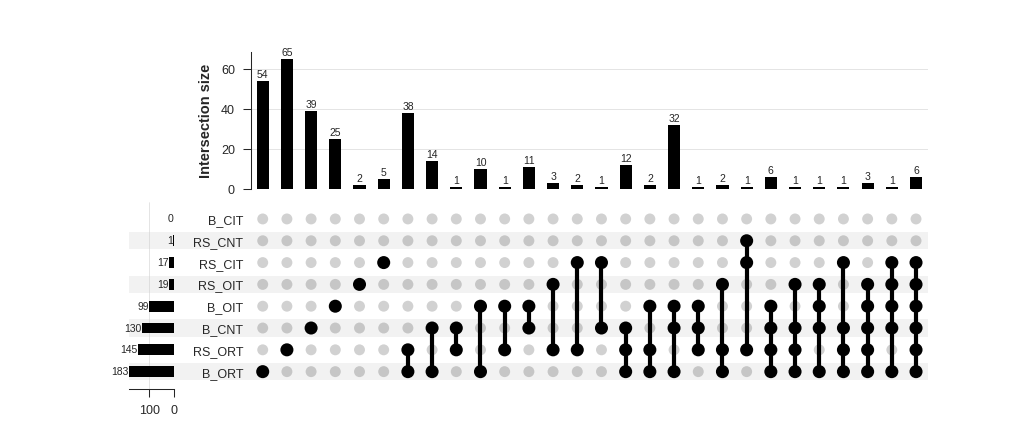

In [21]:

binary_df_ubiquitous = pd.DataFrame(result_dict_ubiquitous).T
binary_df_ubiquitous.columns = filtered_RPKM_norm_df.index

binary_df_ubiquitous=binary_df_ubiquitous.loc[:, (binary_df_ubiquitous != 0).any(axis=0)].T
binary_colums_ubiquitous=binary_df_ubiquitous.columns
binary_df_ubiquitous= binary_df_ubiquitous.merge(metadata_df, left_index=True, right_index=True)
binary_df_ubiquitous = binary_df_ubiquitous.set_index(list(binary_colums_ubiquitous))
binary_df_ubiquitous
upset = UpSet(binary_df_ubiquitous, subset_size="count", show_counts=True, element_size=15)


fig=upset.plot()
plt.show()
plt.savefig("/home/lmf/DANIEL/VIRAL_METAGENOMES/FIGURES_AND_TABLES/UpSet_ubiquitous.svg")
        